In [8]:
import requests
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
countryName = 'England'

competitions = requests.get(f'http://localhost:8080/sql/competitions/country/{countryName}').json()
data = np.array([])
for competition in competitions:
    id = competition['competitionId']
    clubs = requests.get(f'http://localhost:8080/mongo/games/competition/{id}/clubs').json()
    for club in clubs:
        response = requests.get(f'http://localhost:8080/sql/players/club/{club}').json()
        data = np.hstack((data, response))

players_df = pd.DataFrame.from_records(data)

players_df = players_df.drop(columns=['lastSeason', 'currentClubId', 'playerCode', 'contractExpirationDate', 'agentName', 'imageUrl', 'url', 'currentClubDomesticCompetitionId', 'currentClubId', 'currentClubName', 'currentClubId', 'playerCode', 'countryOfCitizenship', 'foot'])

In [10]:
players_df['dateOfBirth'] = pd.to_datetime(players_df['dateOfBirth'])
current_date = datetime.now()

players_df['age'] = np.floor((current_date - players_df['dateOfBirth']) / pd.Timedelta('365 days'))

players_df = players_df.dropna(subset=['marketValueInEur', 'age'])
players_df.reset_index(inplace=True)

players_df['type'] = players_df['countryOfBirth'].apply(lambda x: 'Foreigner' if x != countryName else 'Local')

players_df

,level_0,index,id,firstName,lastName,playerName,countryOfBirth,cityOfBirth,dateOfBirth,subPosition,position,heightInCm,marketValueInEur,highestMarketValueInEur,age,type
0,0,0,392765,Emile,Smith Rowe,Emile Smith Rowe,England,London,2000-07-28,Attacking Midfield,Midfield,182.0,30000000.0,40000000.0,23.0,Local
1,1,1,435338,Gabriel,Magalhães,Gabriel Magalhães,Brazil,São Paulo,1997-12-19,Centre-Back,Defender,190.0,55000000.0,55000000.0,26.0,Foreigner
2,2,2,420243,Jurrien,Timber,Jurrien Timber,Netherlands,Utrecht,2001-06-17,Centre-Back,Defender,182.0,42000000.0,45000000.0,22.0,Foreigner
3,3,3,230784,Thomas,Partey,Thomas Partey,Ghana,Odumase Krobo,1993-06-13,Defensive Midfield,Midfield,185.0,35000000.0,50000000.0,30.0,Foreigner
4,4,4,160438,Mohamed,Elneny,Mohamed Elneny,Egypt,Mahalla,1992-07-11,Defensive Midfield,Midfield,179.0,6000000.0,11000000.0,31.0,Foreigner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,4657,6634,121387,Eirik,Johansen,Eirik Johansen,Norway,Tønsberg,1992-07-12,Goalkeeper,Goalkeeper,201.0,100000.0,300000.0,31.0,Foreigner
4658,4658,6644,104962,Filip,Orsula,Filip Orsula,Slovakia,Sebedražie,1993-02-25,Right-Back,Defender,183.0,100000.0,300000.0,30.0,Foreigner
4659,4659,6646,126258,Lee,Nicholls,Lee Nicholls,England,Liverpool,1992-10-05,Goalkeeper,Goalkeeper,191.0,900000.0,900000.0,31.0,Local
4660,4660,6647,71096,Róger,Espinoza,Róger Espinoza,Honduras,Puerto Cortés,1986-10-25,Central Midfield,Midfield,178.0,150000.0,1500000.0,37.0,Foreigner


In [126]:
players_df.shape

(4662, 13)

In [127]:
players_df.dtypes

id                                  int64
firstName                          object
lastName                           object
playerName                         object
countryOfBirth                     object
cityOfBirth                        object
dateOfBirth                datetime64[ns]
subPosition                        object
position                           object
heightInCm                        float64
marketValueInEur                  float64
highestMarketValueInEur           float64
age                               float64
dtype: object

In [140]:
positions = players_df['position'].unique()
positions

array(['Midfield', 'Defender', 'Attack', 'Goalkeeper', 'Missing'],
      dtype=object)

In [129]:
data = np.array([])
for club in clubs:
    response = requests.get(f'http://localhost:8080/mongo/appearances/club/{club}').json()
    data = np.hstack((data, response))
    
appearances_df = pd.DataFrame.from_records(data)

In [130]:
appearances_df = appearances_df.drop(columns=['_id', 'player_club_id', 'player_current_club_id', 'competition_id'])
appearances_df

,appearance_id,game_id,player_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
0,4171233_102017,4171233,102017,2023-11-29T00:00:00.000Z,Jorginho,0,0,1,0,15
1,4171233_203853,4171233,203853,2023-11-29T00:00:00.000Z,Oleksandr Zinchenko,0,0,0,0,45
2,4171233_262749,4171233,262749,2023-11-29T00:00:00.000Z,David Raya,0,0,0,0,90
3,4171233_309400,4171233,309400,2023-11-29T00:00:00.000Z,Kai Havertz,0,0,1,0,90
4,4171233_316264,4171233,316264,2023-11-29T00:00:00.000Z,Martin Ødegaard,0,0,1,0,90
...,...,...,...,...,...,...,...,...,...,...
37785,2225446_26633,2225446,26633,2012-08-25T00:00:00.000Z,Ali Al-Habsi,0,0,0,0,90
37786,2225446_3791,2225446,3791,2012-08-25T00:00:00.000Z,Gary Caldwell,0,0,0,0,90
37787,2230148_19641,2230148,19641,2012-08-19T00:00:00.000Z,Emmerson Boyce,0,0,0,0,90
37788,2230148_26633,2230148,26633,2012-08-19T00:00:00.000Z,Ali Al-Habsi,0,0,0,0,90


In [131]:
appearances_df.shape

(37790, 10)

In [132]:
appearances_df.dtypes

appearance_id     object
game_id            int64
player_id          int64
date              object
player_name       object
yellow_cards       int64
red_cards          int64
goals              int64
assists            int64
minutes_played     int64
dtype: object

# Distribuzione dei giocatori per eta' e valore di mercato

C:\Users\zhoua\miniconda3\envs\ium\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zhoua\miniconda3\envs\ium\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


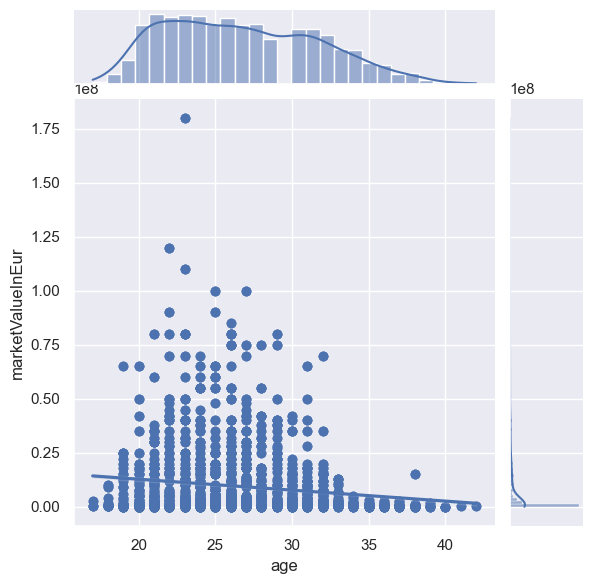

In [133]:
sns.jointplot(data=players_df, x='age', y='marketValueInEur', kind='reg')

Ci siamo chiesti come fossero distribuiti i giocatori in base alla loro eta' e il loro valore di mercato.

# Valore dei giocatori in base all'età

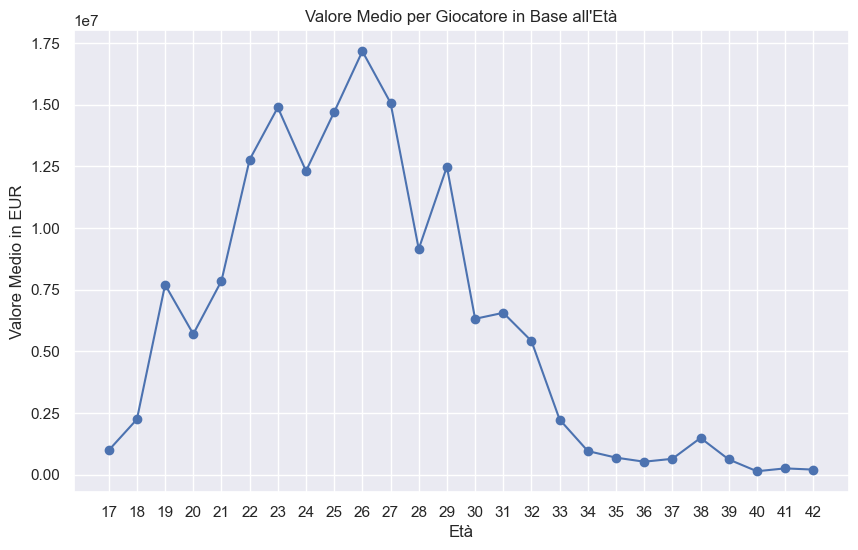

In [134]:
age_value_df = players_df[['age', 'marketValueInEur']]

# Rimuovi le righe con valori mancanti
age_value_df = age_value_df.dropna()

# Calcola il valore medio per giocatore in base all'età
avg_value_by_age = age_value_df.groupby('age')['marketValueInEur'].mean().reset_index()

# Crea il grafico lineare
plt.figure(figsize=(10, 6))
plt.plot(avg_value_by_age['age'], avg_value_by_age['marketValueInEur'], marker='o', linestyle='-', color='b')

plt.xticks(avg_value_by_age['age'])

# Aggiungi etichette e titolo
plt.title('Valore Medio per Giocatore in Base all\'Età')
plt.xlabel('Età')
plt.ylabel('Valore Medio in EUR')

# Mostra il grafico
plt.grid(True)
plt.show()

Andiamo ora a vedere in dettaglio il valore medio dei giocatori in relazione alla loro eta'.


# Goal medi per partita in base all'età

In [135]:
attaccanti = players_df.query('position == "Attack"')
player_age = attaccanti[['age', 'id', 'marketValueInEur']]
appearances_player_df = appearances_df.join(player_age.set_index('id'), rsuffix='_player', on='player_id')
appearances_player_df = appearances_player_df.dropna()
appearances_player_df.reset_index(inplace=True)
appearances_player_df

,index,appearance_id,game_id,player_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played,age,marketValueInEur
0,7,4171233_340324,4171233,340324,2023-11-29T00:00:00.000Z,Eddie Nketiah,0,0,0,0,8,24.0,30000000.0
1,7,4171233_340324,4171233,340324,2023-11-29T00:00:00.000Z,Eddie Nketiah,0,0,0,0,8,24.0,30000000.0
2,7,4171233_340324,4171233,340324,2023-11-29T00:00:00.000Z,Eddie Nketiah,0,0,0,0,8,24.0,30000000.0
3,7,4171233_340324,4171233,340324,2023-11-29T00:00:00.000Z,Eddie Nketiah,0,0,0,0,8,24.0,30000000.0
4,8,4171233_340325,4171233,340325,2023-11-29T00:00:00.000Z,Reiss Nelson,0,0,0,0,24,24.0,12000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29771,37114,2332183_203460,2332183,203460,2014-05-07T00:00:00.000Z,Jack Grealish,0,0,0,0,2,28.0,75000000.0
29772,37295,2379785_203460,2379785,203460,2013-11-09T00:00:00.000Z,Jack Grealish,0,0,0,0,61,28.0,75000000.0
29773,37295,2379785_203460,2379785,203460,2013-11-09T00:00:00.000Z,Jack Grealish,0,0,0,0,61,28.0,75000000.0
29774,37295,2379785_203460,2379785,203460,2013-11-09T00:00:00.000Z,Jack Grealish,0,0,0,0,61,28.0,75000000.0


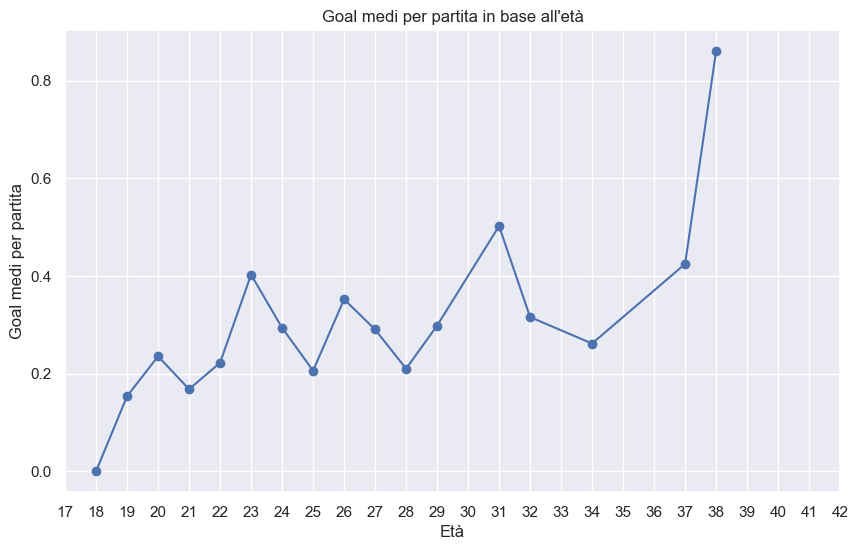

In [136]:
players_goal_age = appearances_player_df[['goals', 'age']]
players_goal_age = players_goal_age.dropna()
avg_players_goal_age = players_goal_age.groupby('age')['goals'].mean().reset_index()

# Crea il grafico lineare
plt.figure(figsize=(10, 6))
plt.plot(avg_players_goal_age['age'], avg_players_goal_age['goals'], marker='o', linestyle='-', color='b')

plt.xticks(avg_value_by_age['age'])

# Aggiungi etichette e titolo
plt.title('Goal medi per partita in base all\'età')
plt.xlabel('Età')
plt.ylabel('Goal medi per partita')

# Mostra il grafico
plt.grid(True)
plt.show()

Passiamo ora ad analizzare la performance dei giocatori in relazione alla loro eta'. Non avendo altre metriche utili alla valutazione della performance, utilizziamo in il numero di goal segnati in media per partita, percio' analizzeremo solo gli attaccanti.

# Confronto tra goal e valore in base all'età

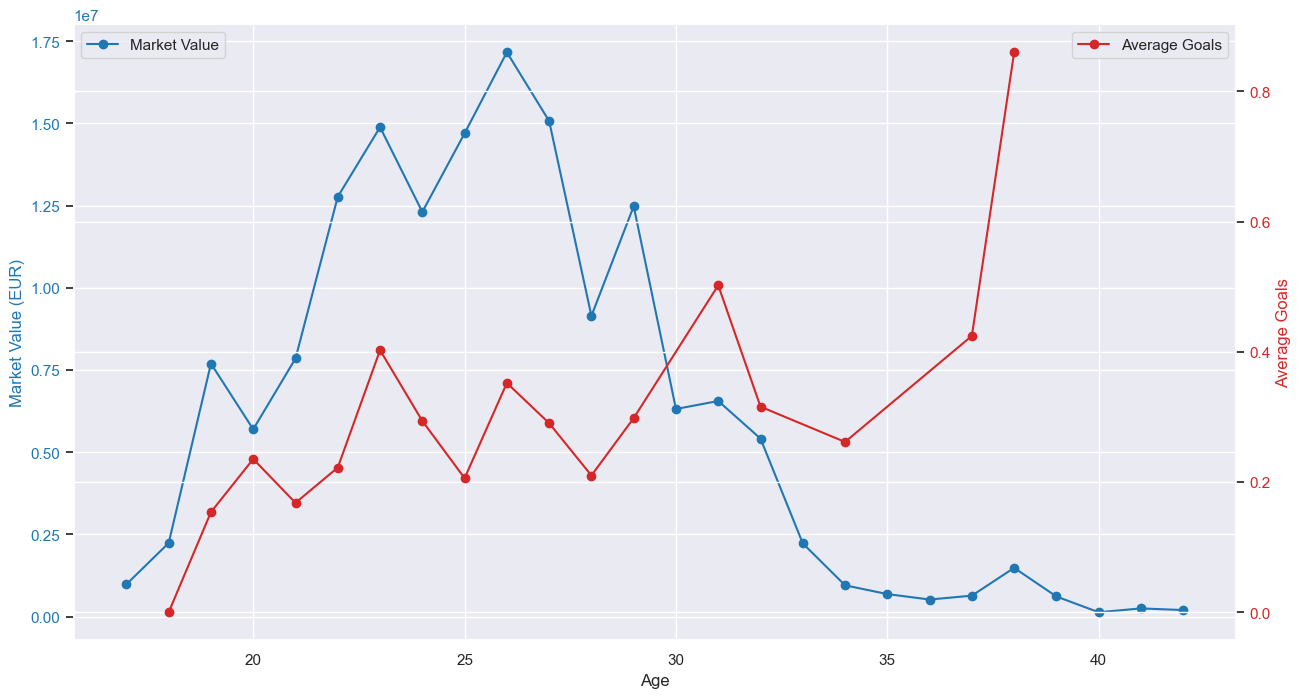

In [137]:
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.set_xlabel('Age')
ax1.set_ylabel('Market Value (EUR)', color='tab:blue')
ax1.plot(avg_value_by_age['age'], avg_value_by_age['marketValueInEur'], marker='o', color='tab:blue', label='Market Value')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Goals', color='tab:red')
ax2.plot(avg_players_goal_age['age'], avg_players_goal_age['goals'], marker='o', color='tab:red', label='Average Goals')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.legend()
plt.show()

Confrontiamo come il numero di goal medi per partita e il valore di mercato dei giocatori cambia per gruppo di eta'.

# Correlazione tra valore e goal medi per partita

<Axes: xlabel='goals', ylabel='marketValueInEur'>

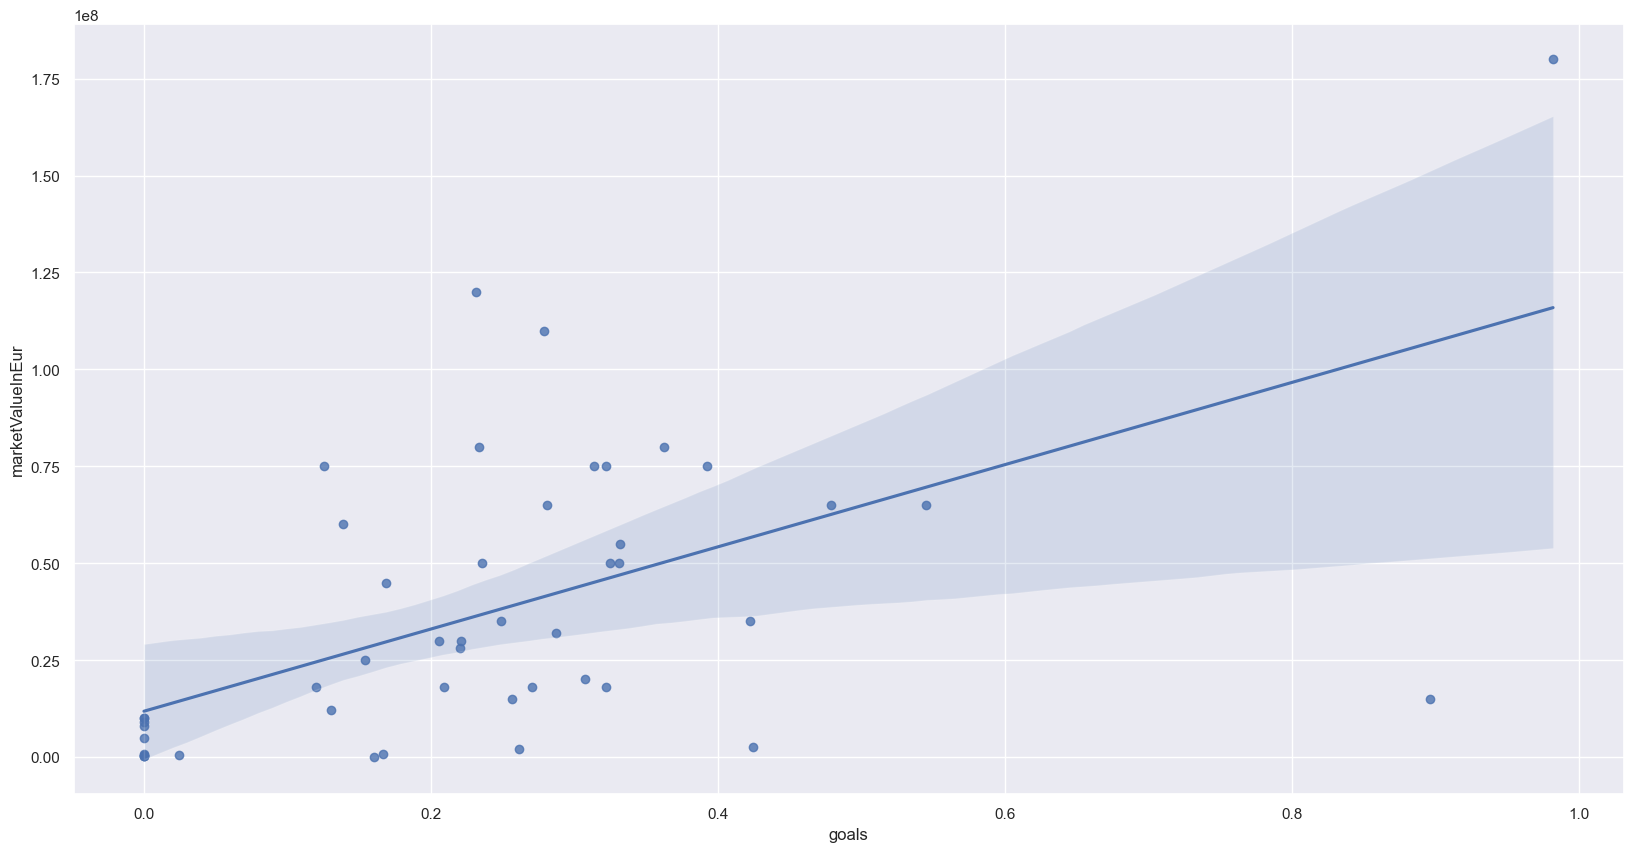

In [138]:
player_goal_value = appearances_player_df[['player_id', 'marketValueInEur', 'goals']]
avg_player_goal_value = player_goal_value.groupby('player_id').agg({
    'goals': 'mean',
    'marketValueInEur': 'mean'
}).reset_index()

sns.set(rc={'figure.figsize':(20,10)})
sns.regplot(data=avg_player_goal_value, x='goals', y='marketValueInEur')

Analizziamo ora in dettaglio se il numero di goal medi per partita di un giocatore influenza il suo valore di mercato.

# Valore medio per posizione di giocatori locali e stranieri

<Axes: xlabel='position', ylabel='marketValueInEur'>

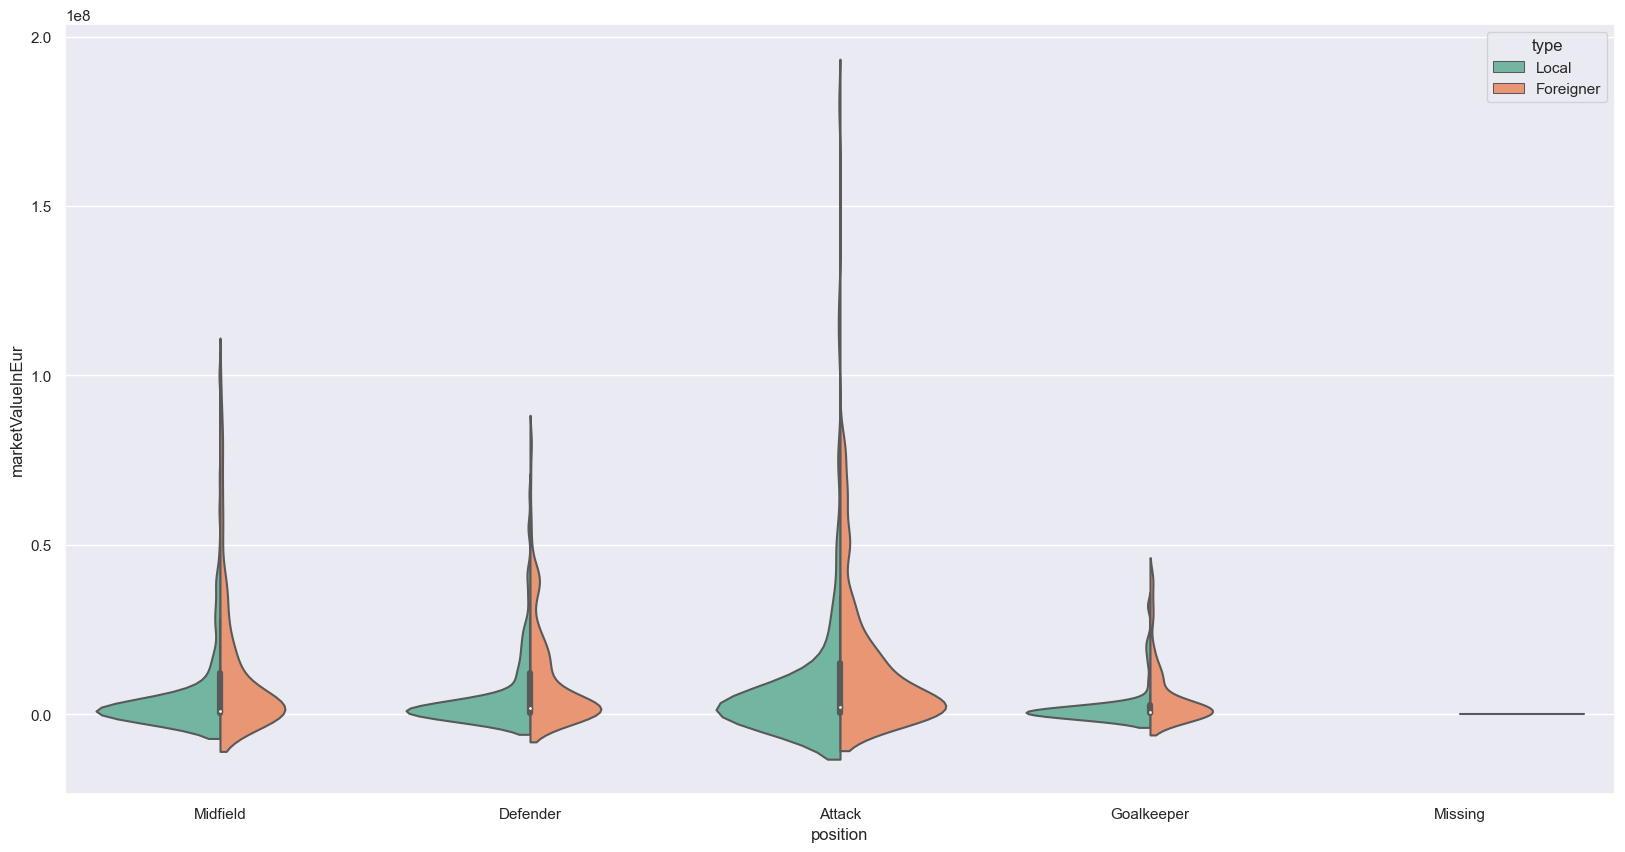

In [148]:
sns.set(rc={'figure.figsize':(20,10)})
sns.violinplot(x='position', y='marketValueInEur', data=players_df, palette='Set2', hue='type', split=True)

Infine vediamo se c'è differenza tra il valore di mercato dei giocatori stranieri e locali e ne confrontiamo la distribuzione e range per ogni posizione.